In [225]:
import os
proc = os.listdir('marlin_features_small')


In [5]:
with open('../../todoESC.txt') as f:
    d = [i.strip('\n') for i in f.readlines()]


In [8]:
import shutil
for f in d:
#     p = f.split('.mp4')[0] + '.pt'
    shutil.copy('/home/surbhi/ximi/marlin_features_large/' + f + '.pt', '/home/surbhi/ximi/todoESC/' + f + '.pt')

In [228]:
marlin_feature_type = 'small'
import pandas as pd
labels = load_labels()

errors = []
processed = []
# ['chunks/' + f.strip('.pt') for f in proc]

todo = list(set([f['chunk'] for f in labels.to_dict(orient='records')]) - set(processed))

In [230]:
len(todo)/8

1425.75

In [231]:
curr = 0
for i in range(8):
    with open(f'todo{i}.txt', 'w') as f:
        for e in todo[curr: curr+1426]:
            f.write(e)
            f.write('\n')
        curr += 1426
    

In [19]:
import os
proc = os.listdir('marlin_features_small/')

In [31]:
# list(set(todo) - set(['chunks/'+f.strip('.pt') for f in proc]))

In [32]:
len(read_file('todo0.txt'))

74

In [1]:
import torch
import glob
features = glob.glob('../data/marlin_features_large/*')

In [3]:
marlin_features = []
for f in features:
    marlin_features.append(torch.load(f))

In [4]:
import numpy as np
arr = np.array([f.shape[0] for f in marlin_features])

np.unique(arr, return_counts=True)

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  23,  33,  38,
         41,  48,  70,  78,  96,  99, 102, 112, 130, 156, 158, 165, 166,
        167, 169, 174, 176, 200, 210, 224, 239, 245, 279, 288, 292, 307,
        312]),
 array([  49,  168,  220,  588,  130,  104,   39,   73, 8637,   61,    1,
           1,    1,    1,    1,    1,   97,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
           1,    1,    1,    1,    1,    1, 1012]))

In [11]:
arr[0].shape

(1024,)

In [68]:
a = np.array([1,2,3,4,4])
np.pad(a, [(0, 2)], mode='constant', constant_values=0)

array([1, 2, 3, 4, 4, 0, 0])

In [76]:
# for small
np.pad(f.cpu(), [(0, 0)], mode='constant', constant_values=0).shape

(9, 384)

In [5]:
def sample(arr, max_len=9):
    hop = int(len(arr)/max_len)
    if len(arr) < max_len:
        
        return np.pad(arr, [(0, max_len - len(arr)), (0,0)], mode='constant', constant_values=0)
    
    if len(arr) == max_len:
        return arr
    
    samples = []
    for i in range(0, len(arr), hop):
        samples.append(list(arr[i]))
#         print (arr[i].shape)
        if len(samples) == max_len:
            return np.array(samples)
    


In [113]:
# tests = []
# for f in marlin_features:
#     if f.shape[0] > 9:
#         tests.append(f)

In [6]:
# arr = tests[-1].cpu()
from tqdm import tqdm

In [15]:
errs = []
sampled_features = []
for f in tqdm(features):
    arr = torch.load(f).cpu().numpy()
    arr = sample(arr)
    if arr.shape[1] != 1024:
        errs.append(arr)
        continue
    name = 'chunks/' + f.strip('.pt').split('/')[-1]
    sampled_features.append((name, arr, labels_map[name]))

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 11206/11206 [00:04<00:00, 2402.09it/s]


In [16]:
sampled_features[0]

('chunks/2020csb1086@iitrpr.ac.in-z2gx0nezbr-0-video_7.mp4',
 array([[-0.08430132, -0.12361335,  0.21771559, ..., -0.25920394,
          0.07247682,  0.18890531],
        [-0.10391595, -0.14875035,  0.1751163 , ..., -0.24888532,
          0.0942831 ,  0.20590289],
        [-0.08567719, -0.13253963,  0.20635292, ..., -0.26200226,
          0.06447093,  0.17006311],
        ...,
        [-0.10507207, -0.16004822,  0.2488413 , ..., -0.2218732 ,
          0.09140521,  0.1684828 ],
        [-0.11147578, -0.14911447,  0.24085946, ..., -0.23567176,
          0.10284477,  0.17793702],
        [-0.0870515 , -0.15794396,  0.2424723 , ..., -0.23055358,
          0.10064396,  0.18524289]], dtype=float32),
 'Highly-Engaged')

In [17]:
sampled_features = np.array(sampled_features, dtype='object')

In [18]:
np.save('Xy_marlin_features_large.npy', sampled_features)

In [14]:
import pandas as pd
labels = pd.read_csv('../data/final_labels.csv')
labels_map = {}
for label in labels.to_dict(orient='records'):
    labels_map[label['chunk']] = label['label']


In [214]:
f.strip('.pt')

'marlin_features_small/pramanshuarya@gmail.com-37kn4gou0j-2-video_11.mp4'

In [220]:
with open('train.txt', 'a') as f:
    data = read_file('valid.txt')
    for d in data:
        f.write(d)
        f.write('\n')

In [20]:
# read_file('train.txt')

In [23]:
import numpy as np
feature_type = 'engage_gaze+hp+au+lmk+pdm'
Xy = np.load(f'Xy_{feature_type}.npy', allow_pickle=True)

In [19]:
# for x in Xy:
#     try:
#         x[1].shape
        
#     except:
#         print (type(x[1])

In [20]:
Xy = [x for x in Xy if len(x[1]) != 0]

In [26]:
Xy[0]

array(['chunks/usma.20csz0015@iitrpr.ac.in-j489ubvnol-0-video_0.mp4',
       array([[-0.14641769,  0.04864785, -0.98797643, ...,  0.07352878,
                0.03628272,  0.08239036],
              [-0.05827138,  0.12800312, -0.98945197, ...,  0.14537832,
                0.14466505,  0.077251  ],
              [-0.03967236,  0.12908675, -0.99073966, ...,  0.08832757,
                0.04017722,  0.05937216],
              ...,
              [-0.0602397 ,  0.23109227, -0.96659063, ...,  0.17050483,
                0.1291142 ,  0.04481384],
              [-0.16780549,  0.1977595 , -0.96518446, ...,  0.12339026,
                0.0533914 ,  0.05826397],
              [-0.14624082,  0.18145725, -0.97167954, ...,  0.10601525,
                0.0482559 ,  0.12645157]])                             ,
       'Barely-engaged'], dtype=object)

### Bodypose

In [52]:
import utils
Xy_bodypose = np.load('../data/Xy_engage_bodypose.npy', allow_pickle=True)
Xy_bodypose = utils.cleanXy(Xy_bodypose)
print (len(Xy_bodypose))

9875


In [53]:
Xy_openface = np.load('../data/Xy_engage_gaze+hp+au+lmk+pdm.npy', allow_pickle=True)
Xy_openface = utils.cleanXy(Xy_openface)
print (len(Xy_openface))

11048


In [54]:
Xy_map = {}
for x in Xy_openface:
    Xy_map[x[0]] = x
    

In [56]:
Xy = []
for x in Xy_bodypose:
    try:
        name = x[0]
        feature = np.hstack((x[1], Xy_map[x[0]][1]))
        label = Xy_map[x[0]][2] 
        Xy.append((name, feature, label))
    except KeyError:
        pass


In [60]:
np.save('../data/Xy_engage_openface_bodypose.npy', np.array(Xy, dtype='object'))

In [57]:
len(Xy)

9740

### XCLIP

In [61]:
import glob
features = glob.glob('../data/XCLIP-Features/*.npy')

In [63]:
X = np.load(features[0], allow_pickle=True)

In [69]:

Xy = []
label_map = {}
for label in labels.to_dict(orient='records'):
    label_map[label['chunk']] = label['label']

In [82]:
for f in features:
    X = np.load(f, allow_pickle=True).flatten()
    key = 'chunks/' + f.strip('.npy').split('/')[-1] + '.mp4'
    Xy.append((key, X, label_map[key]))
    

In [85]:
np.save('../data/Xy_engage_xclip.npy', np.array(Xy, dtype='object'))

In [6]:
from sklearn.svm import LinearSVC

In [1]:
from data_prep import data_loader_v1

In [2]:
train, test = data_loader_v1('engage_xclip', False, False, '../data')

In [4]:
train_x, train_y = train
test_x, test_y = test

In [62]:
clf = LinearSVC(C=0.00001, class_weight=class_weight)
clf.fit(train_x, train_y)

LinearSVC(C=1e-05,
          class_weight={0: 1.417934093789607, 1: 1.9765901060070672,
                        2: 1.1587260486794406, 3: 0.5192620097470411})

In [63]:
preds = clf.predict(test_x)

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(preds, test_y)

0.6356382978723404

In [61]:
from sklearn.metrics import classification_report

In [66]:
print (classification_report(preds, test_y))

              precision    recall  f1-score   support

           0       0.69      0.63      0.66       505
           1       0.17      0.33      0.22       124
           2       0.16      0.41      0.24       167
           3       0.89      0.69      0.78      1460

    accuracy                           0.64      2256
   macro avg       0.48      0.51      0.47      2256
weighted avg       0.75      0.64      0.68      2256



In [38]:
import numpy as np
np.unique(train_y, return_counts=True)

(array([0, 1, 2, 3]), array([1578, 1132, 1931, 4309]))

In [40]:
total = train_x.shape[0]
class_weight = {
        k: (1 / train_y[train_y==k].shape[0]) * (total / 4) for k in np.unique(train_y)
    }

In [41]:
class_weight

{0: 1.417934093789607,
 1: 1.9765901060070672,
 2: 1.1587260486794406,
 3: 0.5192620097470411}

### Engage Features

In [157]:
import glob
import numpy as np
import pandas as pd
import os

n_segments = 10
def get_features(input_segment, features):
    if len(input_segment) == 0:
        return []
    input_segment = input_segment.astype(float)
    
    gaze_direction = input_segment[:, 5:11]
    gaze_angle = input_segment[:, 11:13]
    

    gaze_direction_std = np.std(gaze_direction, axis=0)
    gaze_dircetion_mean = np.mean(gaze_direction, axis=0)
    
    gaze_angle_std = np.std(gaze_angle, axis=0)
    gaze_angle_mean = np.mean(gaze_angle, axis=0)
    
    head_pose_xy_std = np.std(input_segment[:, 293:296], axis=0) 
    head_pose_xy_mean = np.mean(input_segment[:, 293:296], axis=0)
    

    head_pose_theta_std = np.std(input_segment[:, 296: 299], axis=0) 
    head_pose_theta_mean = np.mean(input_segment[:, 296: 299], axis=0)
    
    lmk_mean = np.mean(input_segment[:, 299: 435], axis=0)
    lmk_std = np.std(input_segment[:, 299: 435], axis=0)
    
    au = input_segment[:, 679:]
    au_mean = np.mean(au, axis=0)
    au_std = np.std(au, axis=0)
    
    
    pdm = input_segment[:, 639: 679]
    pdm_mean = np.mean(pdm, axis=0)
    pdm_std = np.std(pdm, axis=0)

    if features == "gaze+hp+au":
        segment_features = np.hstack((
            gaze_direction_std, 
            gaze_dircetion_mean, 
            gaze_angle_std, 
            gaze_angle_mean,
            head_pose_xy_std,
            head_pose_xy_mean,
            head_pose_theta_std,
            head_pose_theta_mean,
            au_mean, 
            au_std))
        
        return segment_features
    
    elif features == "gaze+hp":
        segment_features = np.hstack((
                                      gaze_dircetion_mean,
                                      gaze_direction_std,
                                      head_pose_xy_std,
                                      head_pose_xy_mean,
                                      head_pose_theta_std,
                                      head_pose_theta_mean,
                                    ))
        return segment_features
    elif features == 'gaze+hp+au+lmk':
        segment_features = np.hstack((gaze_dircetion_mean,
                                      gaze_direction_std,
                                      gaze_angle_std, 
                                      gaze_angle_mean,
                                      
                                      head_pose_xy_std,
                                      head_pose_xy_mean,
                                      head_pose_theta_std,
                                      head_pose_theta_mean,
                                      au_mean, 
                                      au_std,
                                      
                                      lmk_mean, 
                                      lmk_std))
        return segment_features
    elif features == 'gaze+hp+au+lmk+pdm':
        segment_features = np.hstack((gaze_dircetion_mean,
                                      gaze_direction_std,
                                      gaze_angle_std, 
                                      gaze_angle_mean,
                                      
                                      head_pose_xy_std,
                                      head_pose_xy_mean,
                                      head_pose_theta_std,
                                      head_pose_theta_mean,
                                      au_mean, 
                                      au_std,
                                      
                                      lmk_mean, 
                                      lmk_std,
                                     
                                      pdm_mean,
                                      pdm_std))
        return segment_features
    
                                   
    
        

In [158]:
def parse_features(openface_feature_file_path, features):
    
    df = pd.read_csv(openface_feature_file_path).dropna()
    df.columns = [i.strip() for i in list(df.columns)]
    df = df[df['confidence']>0.95].values

    window_size = int(df.shape[0]/n_segments)
    if window_size < 1:
        return (openface_feature_file_path, [])
    instance_features = []
    start_index = 0
    for i in range(n_segments):
        if i == n_segments - 1:
            end_index = df.shape[0]
        else:
            end_index = start_index + window_size
        
        # update here for our dataset
        index_features = get_features(df[start_index:end_index, :], features)
        if len(index_features):
            instance_features.append(index_features)
        start_index = start_index + window_size
    
    
    instance_features = np.vstack(instance_features)
#     assert instance_features.shape[0] == 20, "shape issue"
    return instance_features




In [80]:
from tqdm import tqdm


In [102]:
def extract_subject(fname):
    return fname.split('-')[0].split('/')[-1]
def path_to_csv(fname):
    return fname.split('.mp4')[0] + '.csv'
def path_to_mp4(fname):
    return fname.split('.csv')[0] + '.mp4'

In [159]:
_errors_ = []
def extract_features_engage(feature_type):
    labels = pd.read_csv('../data/final_labels.csv')
    data = []
    for f in tqdm(labels.to_dict(orient='records')):

        try:
            
            fname = path_to_csv(f['chunk'])
            fname = '../data/open_face_results/' + fname.split('/')[-1]
            features = parse_features(fname, feature_type)
            data.append((fname, 
                         features, 
                         f['label']
                       ))
        except FileNotFoundError:
            _errors_.append(fname)
        except AssertionError:
            print ("assert: ", _file)
    return data

In [166]:
feature_type = 'gaze+hp'
data = extract_features_engage(feature_type)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 11620/11620 [13:28<00:00, 14.37it/s]


In [161]:
data[0]

('../data/open_face_results/usma.20csz0015@iitrpr.ac.in-j489ubvnol-0-video_0.csv',
 array([[ 4.72424791e-02,  4.39787840e-02,  1.56650778e-03,
          3.69804570e-02,  3.55930822e-02,  3.76496414e-03,
         -1.02344535e-01,  8.83254830e-02, -9.88714200e-01,
         -1.96841843e-01,  9.90571030e-02, -9.74059733e-01,
          4.09109063e-02,  3.97099302e-02, -1.51088000e-01,
          9.49620000e-02,  2.30068664e-01,  2.53937866e-01,
          5.94371727e-01,  3.02529000e+01,  3.71334000e+01,
          4.13723500e+02,  2.35191752e-03,  2.25380367e-03,
          2.33707082e-03, -2.19780000e-02,  1.10963000e-01,
         -7.91900000e-02,  8.30800000e-02,  5.62000000e-02,
          7.79090000e-01,  4.89700000e-02,  0.00000000e+00,
          0.00000000e+00,  2.44700000e-02,  4.51390000e-01,
          3.54460000e-01,  7.70190000e-01,  1.39054000e+00,
          1.33455000e+00,  9.62000000e-03,  0.00000000e+00,
          2.27410000e-01,  6.49250000e-01,  5.81100000e-02,
          0.00000

In [162]:
for idx, d in enumerate(data):
    data[idx] = ('chunks/' + path_to_mp4(d[0]).split('/')[-1], d[1], d[2])

In [163]:
np.save(f'../data/Xy_engage_{feature_type}_10.npy', np.array(data, dtype='object'))

(10, 98)

In [110]:
df = pd.read_csv('../data/open_face_results/2012sonubhardwaj@gmail.com-randomkwkczvv409-0-video_0.csv')

In [119]:
dict(zip(range(len(df.columns)), list(df.columns)))

{0: 'frame',
 1: 'face_id',
 2: 'timestamp',
 3: 'confidence',
 4: 'success',
 5: 'gaze_0_x',
 6: 'gaze_0_y',
 7: 'gaze_0_z',
 8: 'gaze_1_x',
 9: 'gaze_1_y',
 10: 'gaze_1_z',
 11: 'gaze_angle_x',
 12: 'gaze_angle_y',
 13: 'eye_lmk_x_0',
 14: 'eye_lmk_x_1',
 15: 'eye_lmk_x_2',
 16: 'eye_lmk_x_3',
 17: 'eye_lmk_x_4',
 18: 'eye_lmk_x_5',
 19: 'eye_lmk_x_6',
 20: 'eye_lmk_x_7',
 21: 'eye_lmk_x_8',
 22: 'eye_lmk_x_9',
 23: 'eye_lmk_x_10',
 24: 'eye_lmk_x_11',
 25: 'eye_lmk_x_12',
 26: 'eye_lmk_x_13',
 27: 'eye_lmk_x_14',
 28: 'eye_lmk_x_15',
 29: 'eye_lmk_x_16',
 30: 'eye_lmk_x_17',
 31: 'eye_lmk_x_18',
 32: 'eye_lmk_x_19',
 33: 'eye_lmk_x_20',
 34: 'eye_lmk_x_21',
 35: 'eye_lmk_x_22',
 36: 'eye_lmk_x_23',
 37: 'eye_lmk_x_24',
 38: 'eye_lmk_x_25',
 39: 'eye_lmk_x_26',
 40: 'eye_lmk_x_27',
 41: 'eye_lmk_x_28',
 42: 'eye_lmk_x_29',
 43: 'eye_lmk_x_30',
 44: 'eye_lmk_x_31',
 45: 'eye_lmk_x_32',
 46: 'eye_lmk_x_33',
 47: 'eye_lmk_x_34',
 48: 'eye_lmk_x_35',
 49: 'eye_lmk_x_36',
 50: 'eye_lmk_x_

In [127]:
Xy_1 = np.load('../data/Xy_engage_gaze+hp+au.npy', allow_pickle=True)

In [128]:
Xy_2 = np.load('../data/Xy_marlin_features_large.npy', allow_pickle=True)

In [132]:
len(Xy_2)

11206

In [133]:
len(Xy_1)

11528

In [134]:
x1_fm = {}
for xy in Xy_1:
    x1_fm[xy[0]] = xy[1]

In [154]:
data = []
for idx, xy in enumerate(Xy_2):
    x1 = x1_fm[xy[0]]
    if type(x1)!=tuple:
        data.append((xy[0], xy[1], x1, xy[2]))

In [156]:
np.save('../data/Xy_engage_gaze+hp+au_marlin.npy', np.array(data, dtype='object'))


In [148]:
data = np.array(data, dtype='object')

In [155]:
len(data)

10812

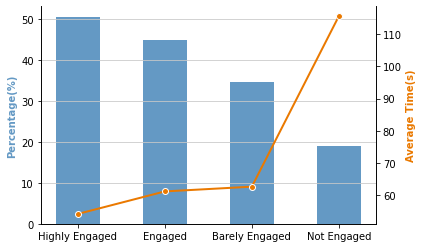

In [217]:
import matplotlib.pyplot as plt
import numpy as np

# create sample data
x = ['Highly Engaged', 'Engaged', 'Barely Engaged', 'Not Engaged']
y1 = [50.53763441, 44.89795918, 34.61538462, 19.04761905]
y2 = [54.25531915, 61.2244898, 62.69230769, 115.4761905]

# create figure and axis objects
fig, ax1 = plt.subplots()

# plot data on first axis
#ax1.plot(x, y1, 'b-', marker='o')
ax1.bar(x, y1, width=0.5, color='#6499c4')

ax1.spines['top'].set_visible(False)
ax1.set_xlabel('')
ax1.set_ylabel('Percentage(%)', color='#6499c4', weight='bold')

# create second axis
ax2 = ax1.twinx()
ax2.plot(x, y2, color='#ea7900', linewidth=2, marker='o', markeredgecolor='w')
ax2.set_ylabel('Average Time(s)', color='#ea7900', weight='bold')

ax1.yaxis.grid(color='#c9c9c9')
ax2.spines['top'].set_visible(False)
plt.savefig('filename.png', dpi=300)

plt.show()

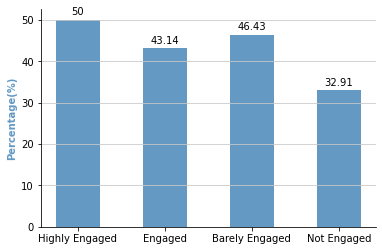

In [221]:
import matplotlib.pyplot as plt
import numpy as np

# create sample data
x = ['Highly Engaged', 'Engaged', 'Barely Engaged', 'Not Engaged']
y1 = [50.00, 43.14, 46.43, 32.91]

# create figure and axis objects
fig, ax1 = plt.subplots()

# plot data on first axis
#ax1.plot(x, y1, 'b-', marker='o')
b = ax1.bar(x, y1, width=0.5, color='#6499c4')
ax1.bar_label(b, padding=3)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xlabel('')
ax1.set_ylabel('Percentage(%)', color='#6499c4', weight='bold')

ax1.yaxis.grid(color='#c9c9c9')

plt.savefig('barp.png', dpi=300)

plt.show()

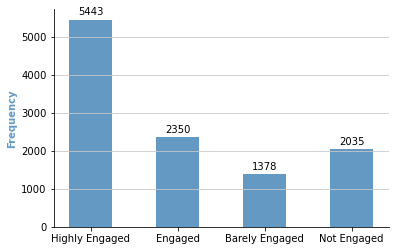

In [220]:
import matplotlib.pyplot as plt
import numpy as np

# create sample data
x = ['Highly Engaged', 'Engaged', 'Barely Engaged', 'Not Engaged']
y1 = [5443, 2350, 1378, 2035]

# create figure and axis objects
fig, ax1 = plt.subplots()

# plot data on first axis
#ax1.plot(x, y1, 'b-', marker='o')
b = ax1.bar(x, y1, width=0.5, color='#6499c4')
ax1.bar_label(b, padding=3)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_xlabel('')
ax1.set_ylabel('Frequency', color='#6499c4', weight='bold')

ax1.yaxis.grid(color='#c9c9c9')

plt.savefig('barf.png', dpi=300)

plt.show()